# Анализ игровых событий и прогрессии


## Импорт библиотек и подключение к бд

In [63]:
import os
import psycopg2
import pandas as pd
from dotenv import load_dotenv


load_dotenv(os.path.join('..', '.env'))


DB_CONFIG = {
    'dbname': os.getenv('POSTGRES_DB'),
    'user': os.getenv('POSTGRES_USER'),
    'password': os.getenv('POSTGRES_PASSWORD'),
    'host': 'localhost',
    'port': '5433'
}

def get_db_connection():
    try:
        conn = psycopg2.connect(**DB_CONFIG)
        print(f"Подключение к базе '{DB_CONFIG['dbname']}' успешно установлено.")
        return conn
    except Exception as e:
        print(f"Ошибка при подключении к БД: {e}")
        return None

conn = get_db_connection()

Подключение к базе 'game_data' успешно установлено.


## Загрузка данных из таблицы game_log

In [64]:
if conn:
    # SQL запрос для получения полной статистики
    query = """
    SELECT 
        gl.id,
        g.nickname,
        gl.current_level,
        gl.points_id,
        a.name as action_type,
        p.name as reward_type,
        gl.reward_value,
        gl.session_duration_sec,
        gl.created_at
    FROM game_log gl
    JOIN gamer g ON gl.gamer_id = g.id
    JOIN action a ON gl.action_id = a.id
    JOIN points p ON gl.points_id = p.id
    ORDER BY gl.created_at DESC;
    """
    
    df = pd.read_sql_query(query, conn)
    
    conn.close()
    
    print(f"Загружено записей: {len(df)}")
    display(df.head())
else:
    print("Не удалось загрузить данные, проверьте статус контейнера с БД.")

Загружено записей: 1202


C:\Users\vanya\AppData\Local\Temp\ipykernel_21972\2064286647.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,id,nickname,current_level,points_id,action_type,reward_type,reward_value,session_duration_sec,created_at
0,1202,mlamb,15,1,quest_complete,exp,990,5996,2026-01-24 19:43:03.829621
1,1201,davidellis,15,3,quest_complete,crystals,328,3796,2026-01-24 19:40:29.829621
2,1200,davidellis,15,1,quest_complete,exp,441,3796,2026-01-24 19:40:29.829621
3,1199,boylethomas,14,1,resource_gather,exp,490,2118,2026-01-24 19:38:21.829621
4,1197,vancedebbie,13,1,quest_complete,exp,150,1829,2026-01-24 19:35:17.829621


## Визуализация данных

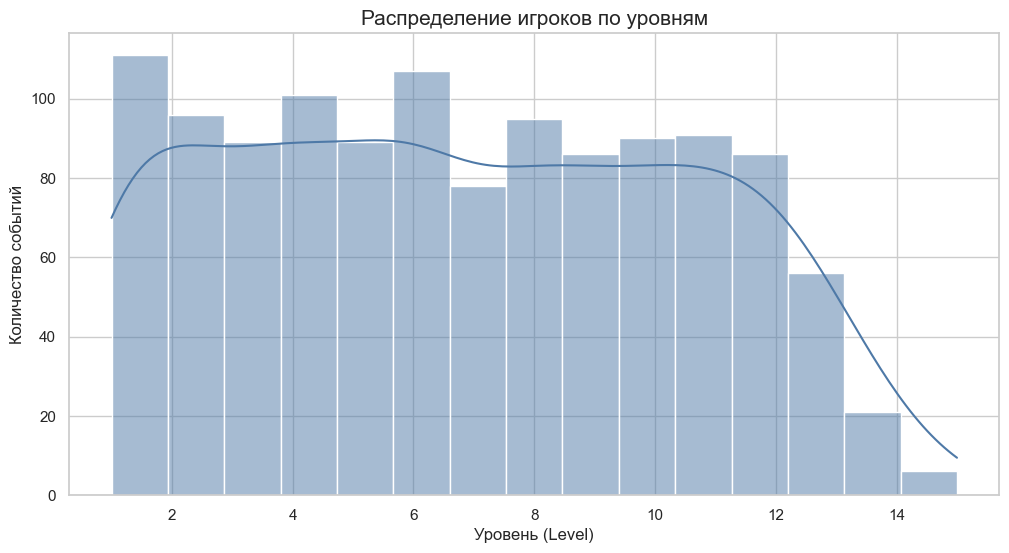

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

ax = sns.histplot(df['current_level'], bins=max(df['current_level']), kde=True, color='#4e79a7')

plt.title('Распределение игроков по уровням', fontsize=15)
plt.xlabel('Уровень (Level)', fontsize=12)
plt.ylabel('Количество событий', fontsize=12)

plt.show()

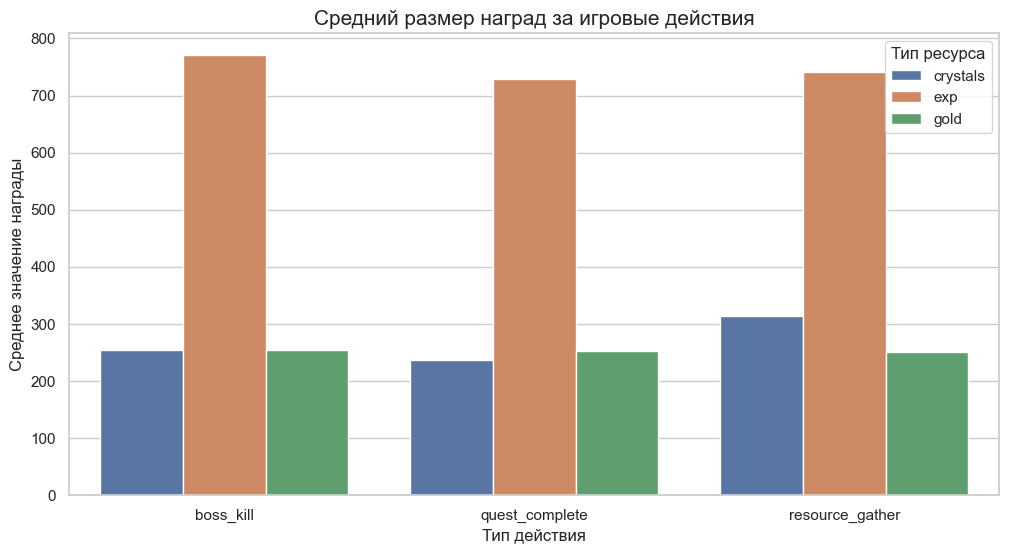

In [66]:
economy_data = df.groupby(['action_type', 'reward_type'])['reward_value'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=economy_data, x='action_type', y='reward_value', hue='reward_type')

plt.title('Средний размер наград за игровые действия', fontsize=15)
plt.xlabel('Тип действия', fontsize=12)
plt.ylabel('Среднее значение награды', fontsize=12)
plt.legend(title='Тип ресурса')

plt.show()